<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/mobile-price-range-classification/blob/RandomForestClassifier/RF_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [2]:
data = pd.read_csv('/content/train.csv')

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
def plot_hist(x):
  columns = x.columns
  fig, axes = plt.subplots(6, 4, figsize=(12, 18))

  for i, col in enumerate(columns):
      row = i // 4
      col_idx = i % 4
      axes[row, col_idx].hist(x[col], bins=30)
      axes[row, col_idx].set_xlabel(col)

  plt.tight_layout()
  plt.show()

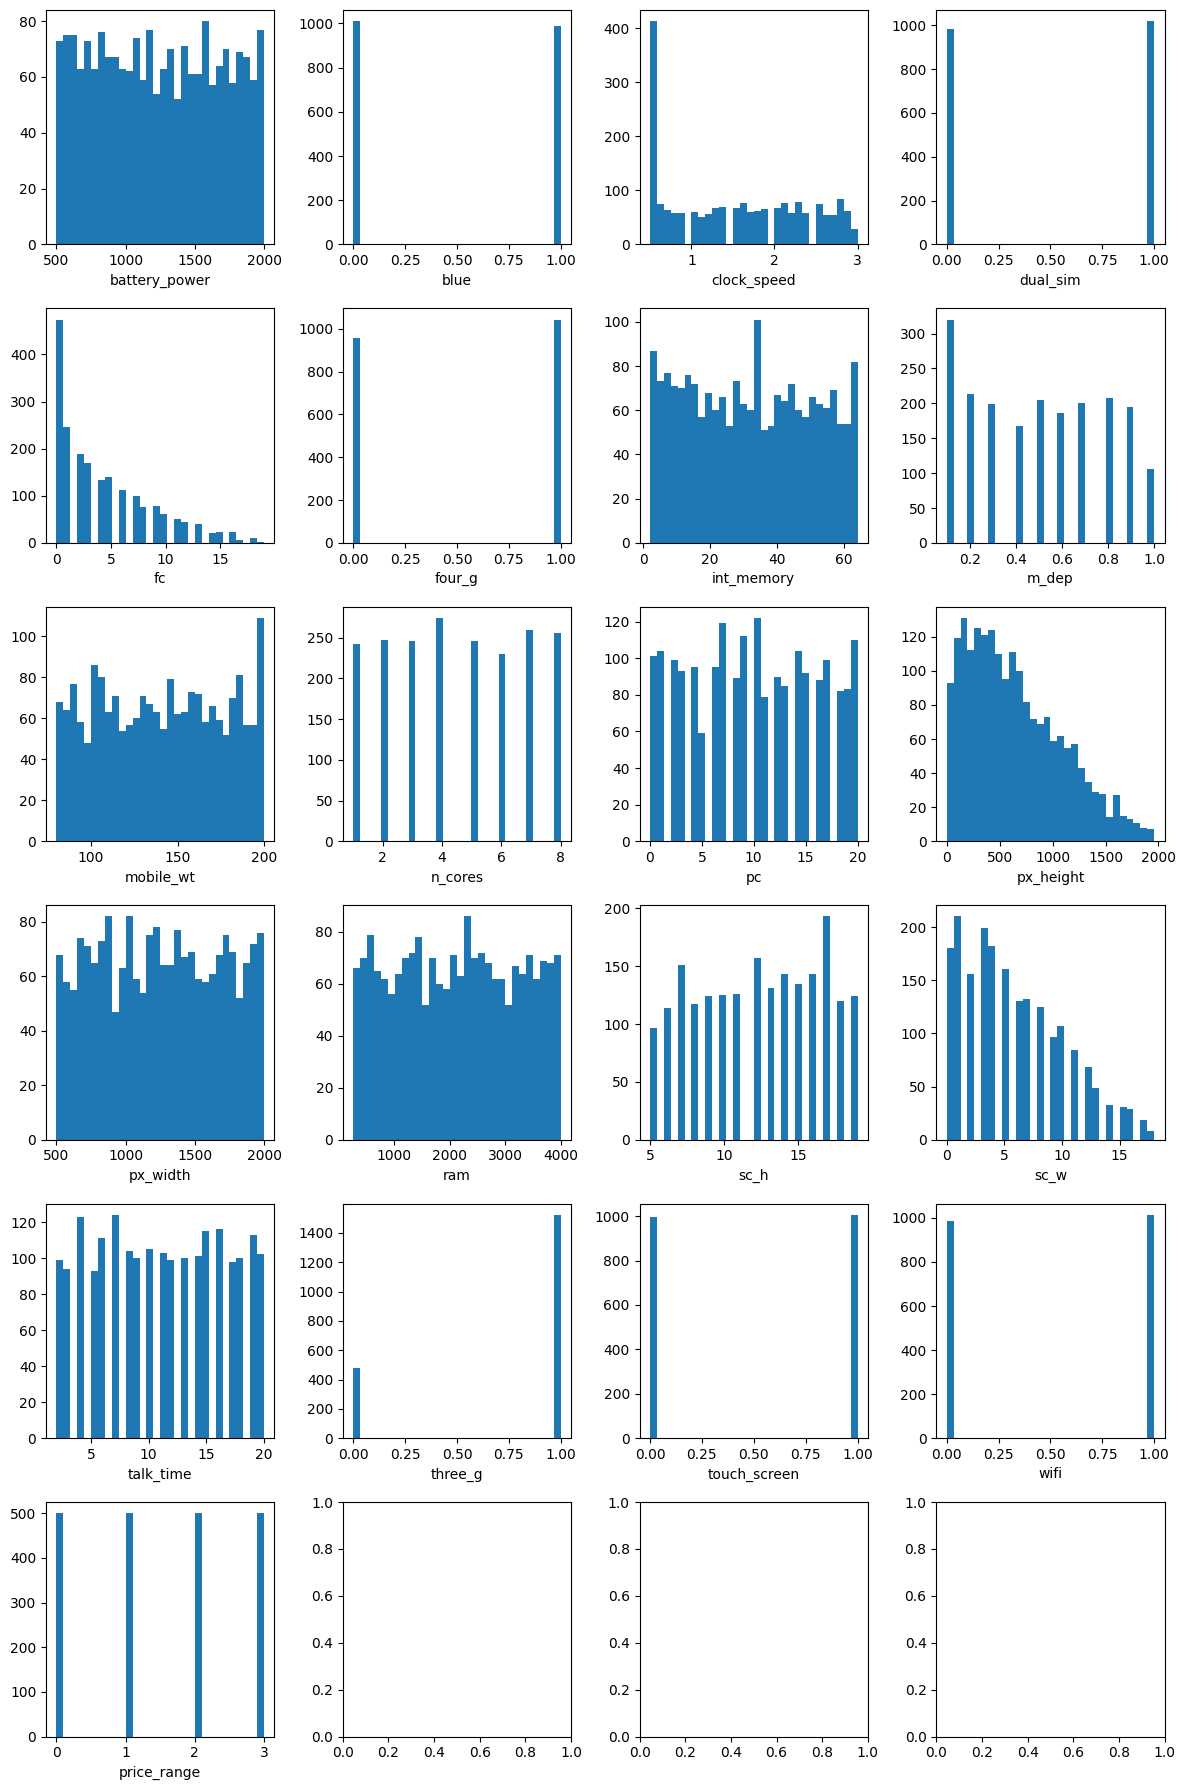

In [5]:
plot_hist(data)

In [6]:
def plot_individual_hist(X,y):
  fig, axes = plt.subplots(5,4, figsize=(12,18))
  axes = axes.flatten()
  for i, ax in zip(X.columns, axes):
          ax.scatter(X[i], y)
          ax.set_xlabel(i)
          ax.set_ylabel('Price range')

  plt.tight_layout()
  plt.show()

In [7]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
print(data.isnull().any())

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool


In [10]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

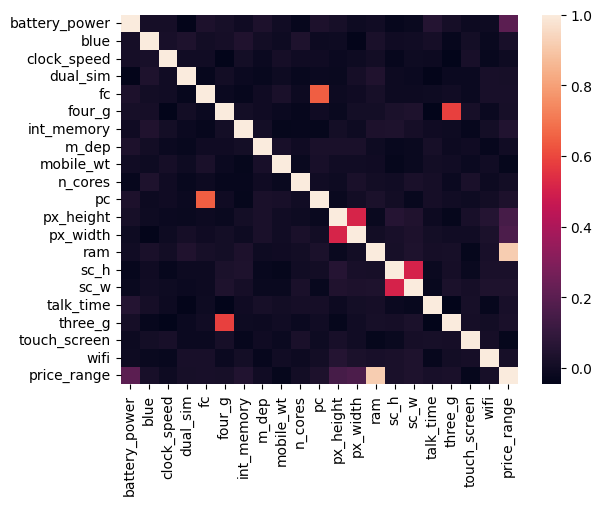

In [11]:
sns.heatmap(data.corr())

In [12]:
X = data.drop(columns=['price_range'])
y = data['price_range']

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [14]:
columns = data.columns
filtered_columns = columns.drop(['blue', 'dual_sim', 'four_g', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range' ])

In [15]:
scaled_data = X_train.copy()
sc = StandardScaler()
scaled_data[filtered_columns] = sc.fit_transform(scaled_data[filtered_columns])
print(scaled_data.head())

      battery_power  blue  clock_speed  dual_sim        fc  four_g  \
1674       1.596720     0    -0.403451         0 -0.296197       0   
1100      -1.131341     0    -0.035423         0 -0.764493       0   
727        0.792350     0    -1.139506         1 -0.998641       0   
1643       1.071047     1     0.577957         0  1.108690       1   
49        -1.459886     0     0.700633         1  1.108690       0   

      int_memory     m_dep  mobile_wt   n_cores        pc  px_height  \
1674   -0.317753  0.675175  -0.816256  0.641116 -0.806278   0.931118   
1100   -0.977806 -0.717387   1.046449  0.204797  0.521783  -0.718285   
727    -1.362837 -0.717387  -0.534028 -0.667841  1.185813   1.834900   
1643   -1.472845  0.675175   1.639128  0.641116  1.019806  -1.228923   
49      1.772413  1.023316  -0.844479  1.513754  0.853798   0.526675   

      px_width       ram      sc_h      sc_w  talk_time  three_g  \
1674  0.672829  1.087456  1.351845  0.280847         20        0   
1100 -1.53

<Axes: >

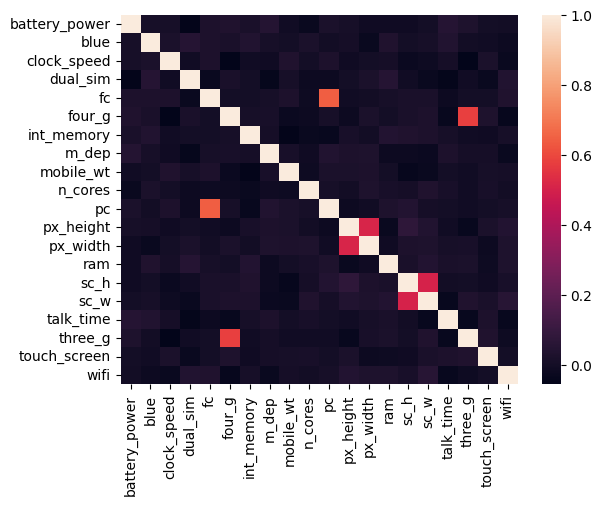

In [16]:
sns.heatmap(scaled_data.corr())

In [17]:
scaled_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1.600000e+03,1600.000000,1.600000e+03,1600.000000,1.600000e+03,1600.000000,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1600.000000,1600.000000,1600.000000,1600.000000
mean,-1.465494e-16,0.501875,1.887379e-17,0.523125,5.773160e-17,0.521875,-2.664535e-17,-2.675637e-16,4.440892e-18,1.487699e-16,-8.881784e-17,-3.996803e-17,1.021405e-16,-1.731948e-16,1.998401e-16,-9.325873e-17,10.944375,0.766875,0.500625,0.506250
std,1.000313e+00,0.500153,1.000313e+00,0.499621,1.000313e+00,0.499677,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,5.489774,0.422953,0.500156,0.500117
min,-1.675140e+00,0.000000,-1.262182e+00,0.000000,-9.986408e-01,0.000000,-1.637859e+00,-1.413668e+00,-1.719386e+00,-1.540479e+00,-1.636317e+00,-1.470684e+00,-1.750416e+00,-1.743974e+00,-1.734355e+00,-1.326455e+00,2.000000,0.000000,0.000000,0.000000
25%,-9.002261e-01,0.000000,-1.016830e+00,0.000000,-7.644929e-01,0.000000,-8.677973e-01,-1.065528e+00,-8.727020e-01,-6.678407e-01,-8.477803e-01,-8.182664e-01,-8.626693e-01,-8.469079e-01,-7.847554e-01,-8.672259e-01,6.000000,1.000000,0.000000,0.000000
50%,-1.995064e-02,1.000000,-3.542268e-02,1.000000,-2.961971e-01,1.000000,-4.273153e-02,-2.110602e-02,1.631631e-02,-2.315217e-01,2.375985e-02,-1.703672e-01,-1.569867e-02,3.075218e-02,-7.255538e-02,-1.783819e-01,11.000000,1.000000,1.000000,1.000000
75%,8.620242e-01,1.000000,8.233090e-01,1.000000,6.403945e-01,1.000000,8.373386e-01,1.023316e+00,8.488890e-01,1.077435e+00,8.537981e-01,6.786235e-01,8.854455e-01,8.827686e-01,8.770447e-01,7.400768e-01,16.000000,1.000000,1.000000,1.000000
max,1.716809e+00,1.000000,1.804717e+00,1.000000,3.216021e+00,1.000000,1.772413e+00,1.719597e+00,1.667350e+00,1.513754e+00,1.683836e+00,2.930737e+00,1.737659e+00,1.712145e+00,1.589245e+00,2.806609e+00,20.000000,1.000000,1.000000,1.000000


In [18]:
rf = RandomForestClassifier(n_estimators=500, max_depth=80)
rf.fit(scaled_data, y_train)

RandomForestClassifier(max_depth=80, n_estimators=500)

In [19]:
y_train_pred = rf.predict(scaled_data)
print(y_train_pred)

[3 0 1 ... 2 2 3]


In [20]:
print(accuracy_score(y_train_pred, y_train))

1.0


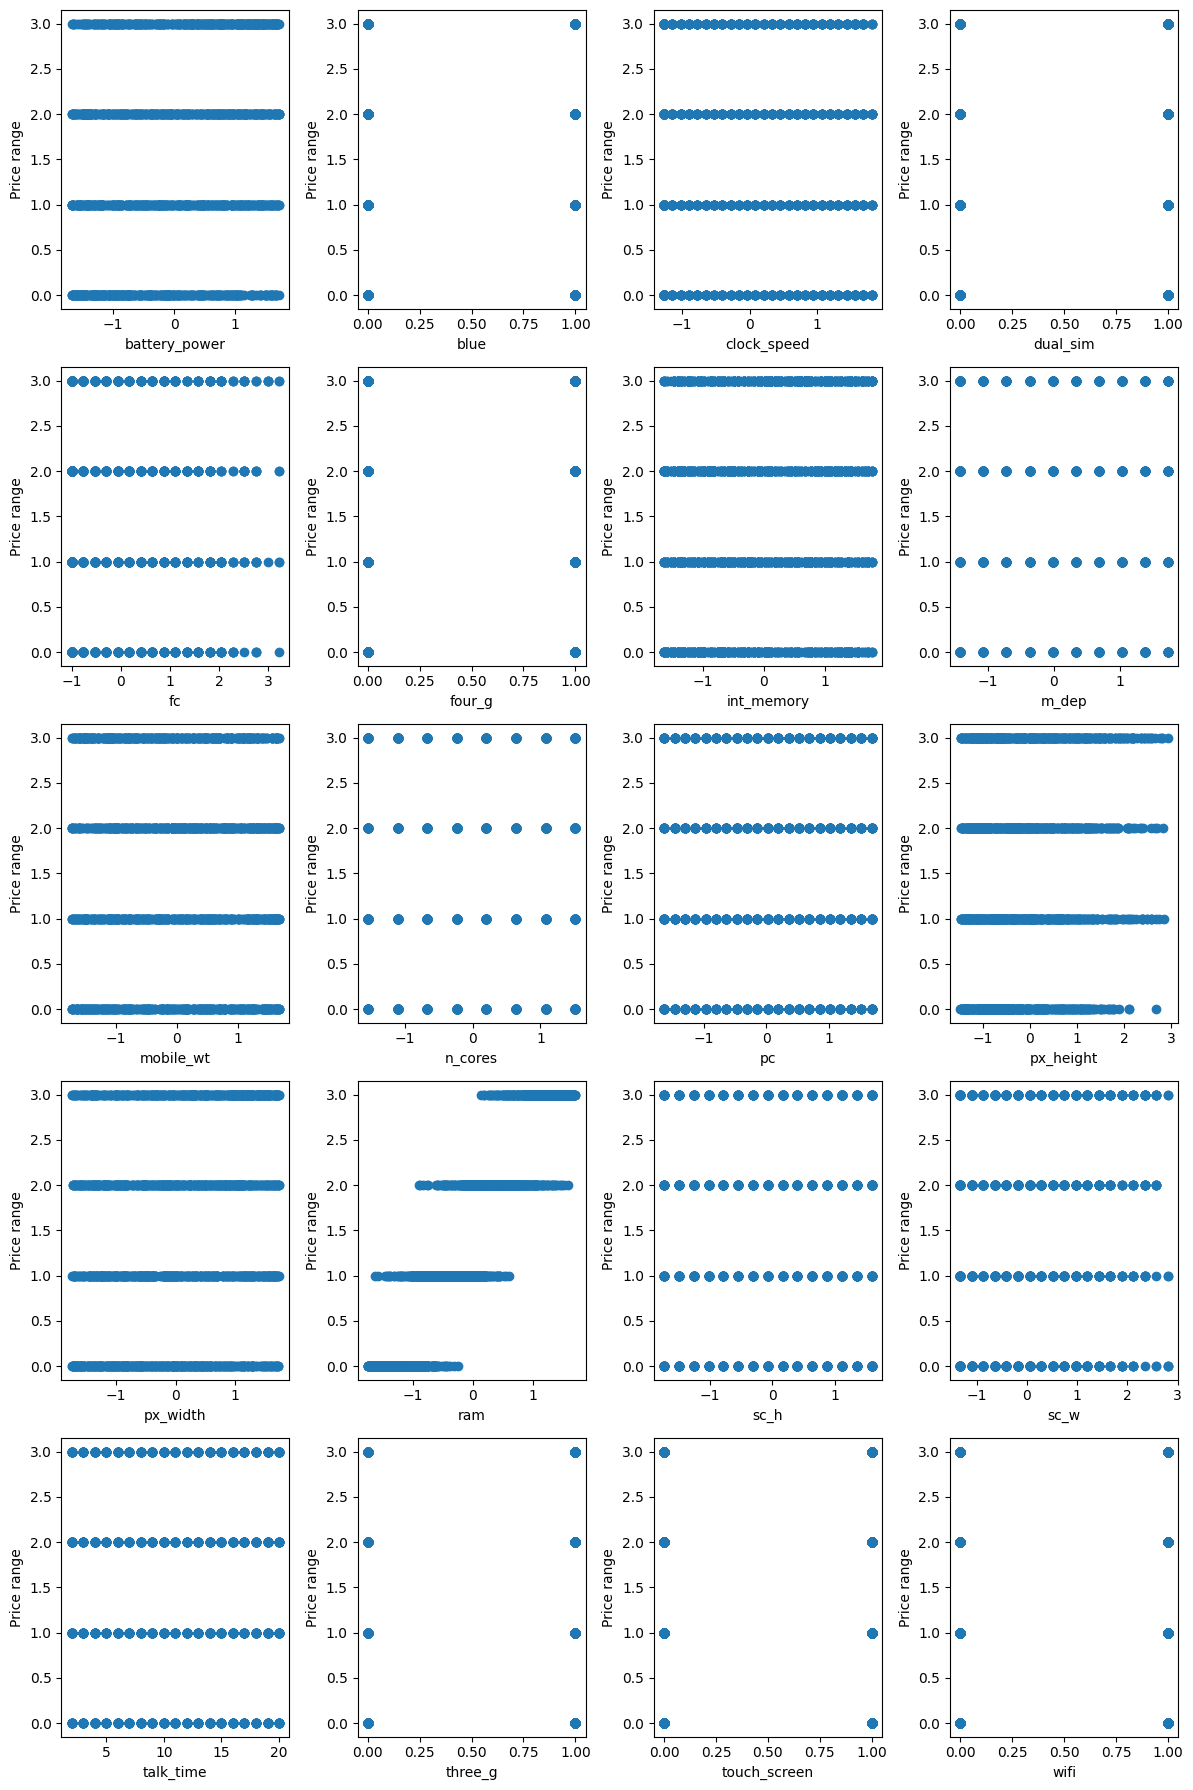

In [21]:
plot_individual_hist(scaled_data, y_train_pred)

In [22]:
def plot_confusion_matrix(y_hat, y_actual):
  sns.heatmap(confusion_matrix(y_actual, y_hat), annot=True, fmt='d', cmap='Reds')

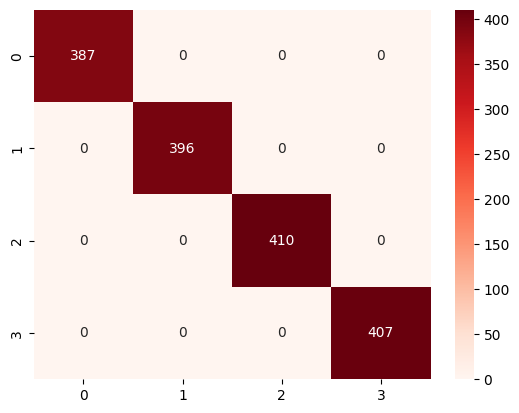

In [23]:
plot_confusion_matrix(y_train, y_train_pred)

In [24]:
X_val_scaled = X_val.copy()
X_val_scaled[filtered_columns] = sc.transform(X_val_scaled[filtered_columns])
X_val_scaled.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
38,-1.020315,0,0.577957,1,2.747726,1,-1.142819,-0.717387,-1.521826,0.641116,1.185813,-0.688912,-1.214506,0.946069,-1.496955,-1.096841,2,1,0,1
1582,-0.157033,1,0.209929,1,-0.530345,0,-0.702784,-0.717387,0.735998,1.077435,1.517829,-0.912599,-1.156255,-1.739354,-1.496955,-0.178382,8,0,0,0
1093,0.368639,1,1.191337,1,-0.296197,0,1.662404,1.371456,-1.437158,-0.231522,0.521783,-0.982642,0.866223,-1.131298,0.402245,1.658536,18,1,0,0
507,-1.650216,1,-1.262182,1,0.640394,0,-0.922802,1.371456,-1.634718,-0.667841,0.853798,-0.910339,1.392812,0.429500,1.351845,1.888150,15,0,1,1
616,0.291601,1,0.332605,1,0.406247,0,0.122282,-0.021106,0.594884,-1.540479,-0.474263,-0.223464,-1.221496,1.580923,1.351845,-0.407997,18,0,1,1


In [25]:
y_val_pred = rf.predict(X_val_scaled)
print(y_val_pred)

[2 0 0 2 3 3 1 3 3 3 0 2 1 2 3 3 0 3 3 1 2 1 2 3 3 2 0 2 0 2 1 1 2 0 2 0 3
 1 1 0 2 3 1 2 1 2 3 3 0 1 0 3 0 3 3 1 1 1 2 0 1 2 1 0 2 2 1 1 1 1 2 1 1 3
 2 0 0 1 2 0 2 0 2 1 1 1 0 0 0 3 2 1 3 1 2 1 2 0 3 0 1 1 3 0 2 0 2 3 2 2 0
 2 3 2 1 3 0 0 3 1 3 0 0 1 0 0 2 1 3 0 3 2 0 2 1 3 2 2 0 3 1 1 2 2 0 1 0 0
 3 3 1 1 1 3 1 2 0 3 1 0 0 0 2 0 2 0 1 1 0 0 3 0 3 2 0 3 2 1 1 1 2 3 0 3 1
 3 2 1 3 3 3 1 1 0 0 0 2 3 2 2 3 0 1 2 2 3 1 2 2 0 3 0 2 0 1 1 1 1 0 0 3 3
 3 1 2 1 0 0 3 0 0 0 1 2 3 2 2 0 0 2 2 3 0 2 3 0 1 0 0 3 2 0 2 1 2 1 0 3 1
 3 0 0 3 0 3 2 1 2 0 0 2 3 0 3 1 0 3 2 0 2 3 0 3 0 3 1 2 0 2 0 1 2 0 1 1 3
 2 0 0 2 2 1 0 3 1 2 2 2 1 3 1 0 0 0 3 0 0 1 0 2 2 0 0 3 3 1 0 1 0 0 3 2 3
 0 1 3 2 3 1 2 0 0 0 0 1 0 3 2 1 0 3 0 2 0 1 1 2 0 3 1 1 3 1 0 1 1 1 2 0 2
 2 0 3 1 0 3 0 0 1 1 2 3 0 1 0 1 0 3 0 1 0 1 1 3 1 2 2 3 2 2]


In [26]:
print(accuracy_score(y_val_pred, y_val))

0.875


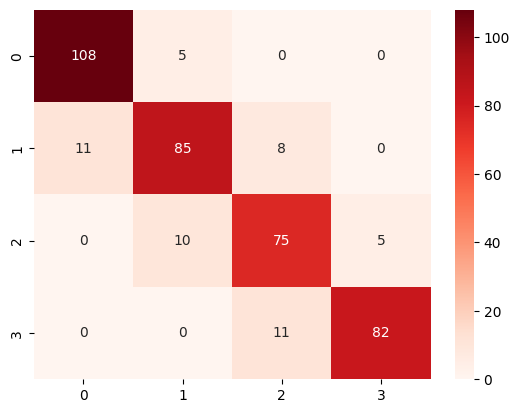

In [27]:
plot_confusion_matrix(y_val_pred, y_val)

In [28]:
param_dist = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [None, 20, 50],
    'randomforestclassifier__min_samples_split': [2, 8, 32],
    'randomforestclassifier__min_samples_leaf': [1, 4, 32],
    'randomforestclassifier__max_features': ['sqrt', 'log2'],
    'randomforestclassifier__max_leaf_nodes': [None, 10, 30, 50],
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__class_weight': [None, 'balanced']
}

In [29]:
random_search = RandomizedSearchCV(
    estimator= make_pipeline(StandardScaler(), RandomForestClassifier()),
    param_distributions=param_dist,
    n_iter=10,
    cv=10,
    n_jobs=-1,
    random_state=42
)

In [30]:
grid_search = GridSearchCV(
    estimator= make_pipeline(StandardScaler(), RandomForestClassifier()),
    param_grid=param_dist,
    cv=3,
    n_jobs=-1
)

In [31]:
random_search.fit(scaled_data, y_train)
print(random_search.best_params_)

{'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_leaf_nodes': 50, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 50, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__bootstrap': False}


In [32]:
print(f'Best Estimators : {random_search.best_estimator_}')
print(f'Best Params : {random_search.best_params_}')
print(f'Best Score : {random_search.best_score_}')
print(f'Best Index : {random_search.best_index_}')

Best Estimators : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced', max_depth=50,
                                        max_leaf_nodes=50))])
Best Params : {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_leaf_nodes': 50, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 50, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__bootstrap': False}
Best Score : 0.8606250000000001
Best Index : 8


In [33]:
grid_search.fit(scaled_data, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__bootstrap': [True, False],
                         'randomforestclassifier__class_weight': [None,
                                                                  'balanced'],
                         'randomforestclassifier__max_depth': [None, 20, 50],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2'],
                         'randomforestclassifier__max_leaf_nodes': [None, 10,
                                                                    30, 50],
                         'randomforestclassifier__min_samples_leaf': [1, 4, 32],
                         'randomforestclassifier__min_samples_split': [2, 8,
                                                                       32],
                         'randomforestclassifier__n_estimators': [100, 200]})

In [37]:
print(f'Best Estimators : {grid_search.best_estimator_}')
print(f'Best Params : {grid_search.best_params_}')
print(f'Best Score : {grid_search.best_score_}')
print(f'Best Index : {grid_search.best_index_}')

Best Estimators : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced',
                                        min_samples_split=8,
                                        n_estimators=200))])
Best Params : {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_leaf_nodes': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 8, 'randomforestclassifier__n_estimators': 200}
Best Score : 0.8706307547085843
Best Index : 1299


In [39]:
grc = grid_search.best_estimator_
g_y_train_pred = grc.predict(scaled_data)
print(accuracy_score(g_y_train_pred, y_train))

1.0


In [40]:
g_y_val_pred = grc.predict(X_val_scaled)
print(accuracy_score(g_y_val_pred, y_val))

0.8775


In [35]:
def random_forest(estimator, max_depth, min_samples_split, min_samples_leaf,max_leaf_nodes,bootstrap, classweight):
  rf2 = RandomForestClassifier(
      n_estimators=estimator,
      max_depth=max_depth,
      min_samples_split = min_samples_split,
      max_features='sqrt',
      min_samples_leaf=min_samples_leaf,
      max_leaf_nodes=max_leaf_nodes,
      bootstrap=bootstrap,
      class_weight=classweight
      )
  rf2.fit(scaled_data, y_train)
  y_train_pred = rf2.predict(scaled_data)
  print(f'Training Accuracy: {accuracy_score(y_train_pred, y_train)}')

  y_train_pred = rf2.predict(X_val_scaled)
  print(f'Validation Accuracy: {accuracy_score(y_val_pred, y_val)}')
  plot_confusion_matrix(y_val_pred, y_val)

Training Accuracy: 1.0
Validation Accuracy: 0.875


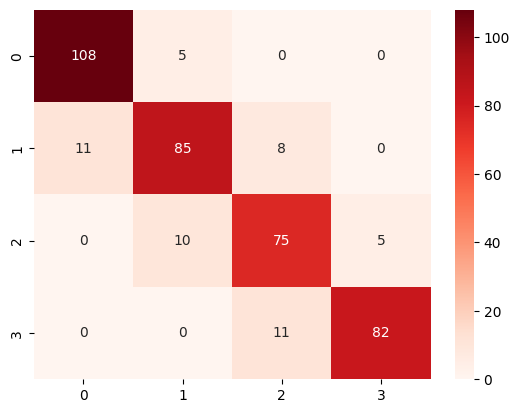

In [36]:
random_forest(
    estimator = 200,
    max_depth = 20,
    min_samples_split=8,
    min_samples_leaf=4,
    max_leaf_nodes = None,
    bootstrap=False,
    classweight='balanced')